### Customizing Colorbars

• Plot legends identify discrete labels of discrete points. For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool.

• In Matplotlib, a colorbar is a separate axes that can provide a key for the meaning of colors
in a plot.

• Because the book is printed in black and white, this section has an accompanying online appendix where you can view the figures in full color.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

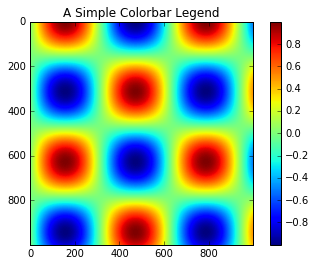

In [2]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)
plt.colorbar()
plt.title('A Simple Colorbar Legend');

### Customizing Colorbars

• We can specify the colormap using the cmap argument to the plotting function that is creating the visualization.

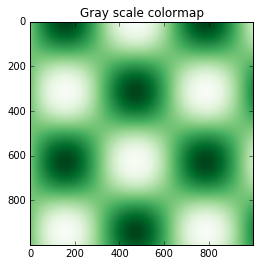

In [3]:
plt.imshow(I, cmap = 'Greens')
plt.title('Gray scale colormap');

### Choosing the colormap
Broadly, you should be aware of three different categories of colormaps:

• Sequential colormaps:

    These consist of one continuous sequence of colors (e.g., binary or viridis ).
• Divergent colormaps:

    These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., RdBu or PuOr).

• Qualitative colormaps:

    These mix colors with no particular sequence (e.g., rainbow or jet ).

In [12]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    # convert RGBA to percieved grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
def view_colormap(cmap):
    """Plot a colormap with its grayscale equalant"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = plt.cm.get_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize = (6, 2), subplot_kw = dict(xticks = [], yticks = []))
    ax[0].imshow([colors], extent = [0, 10, 0, 1])
    ax[1].imshow([grayscale], extent = [0, 10, 0, 1])

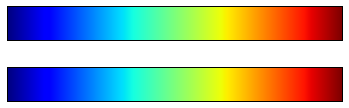

In [10]:
view_colormap('jet')

• Notice the bright stripes in the grayscale image. Even in full color, this uneven brightness means that the eye will be drawn to certain portions of the color range, which will potentially emphasize unimportant parts of the dataset.

• It’s better to use a colormap such as viridis (the default as of Matplotlib 2.0), which is specifically constructed to have an even brightness variation across the range.

• Thus, it not only plays well with our color perception, but also will translate well to grayscale printing.

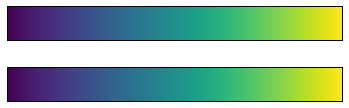

In [13]:
view_colormap('viridis')

• If you favor rainbow schemes, another good option for continuous data is the
cubehelix colormap

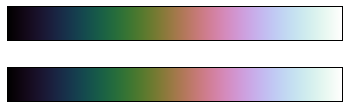

In [14]:
view_colormap('cubehelix')

### Color limits and extensions
• Matplotlib allows for a large range of colorbar customization. The colorbar itself is simply an instance of plt.Axes, so all of the axes and tick formatting tricks we’ve learned are applicable.

• The colorbar has some interesting flexibility; for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the extend property.

• This might come in handy, for example, if you’re displaying an image that is subject to noise.

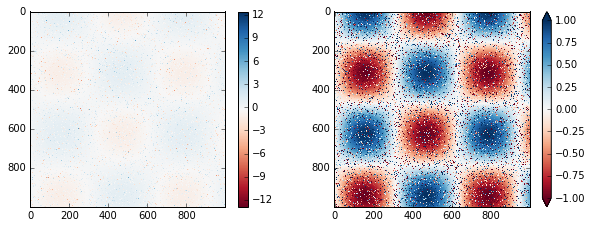

In [22]:
# Make a noise of 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend = 'both')
plt.clim(-1, 1)

• Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes out the pattern we are interested in.

• In the right panel, we manually set the color limits, and add extensions to indicate values that are above or below those limits. 

• The result is a much more useful visualization of our data.

### Discrete colorbars

• Colormaps are by default continuous, but sometimes you’d like to represent discrete values.

• The easiest way to do this is to use the plt.cm.get_cmap() function, and pass the name of a suitable colormap along with the number of desired bins.

• The discrete version of a colormap can be used just like any other colormap.

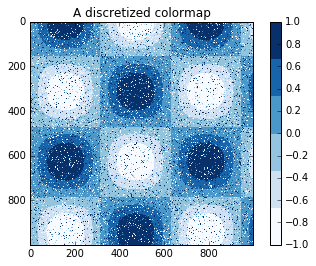

In [23]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)
plt.title('A discretized colormap');